
# 🛫 Análisis de Sentimiento en Tweets de Aerolíneas

**Dataset**: Twitter US Airline Sentiment (Kaggle)  
**Archivo a subir en Colab**: `Tweets.csv`

> Objetivo: Construir un modelo de PLN que clasifique tweets como **positivos**, **negativos** o **neutros** usando **CountVectorizer** y **Multinomial Naive Bayes**.

**Pasos**:
1. Carga y exploración
2. Preparación y vectorización
3. División y entrenamiento
4. Evaluación (accuracy y matriz de confusión)


## 1) Carga y Exploración de Datos

In [ ]:
# Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
df = pd.read_csv("Tweets.csv")

# Revisar
print("Columnas disponibles:", list(df.columns))

# Nos quedamos con las columnas necesarias
df = df[["text", "airline_sentiment"]].dropna()
df.head()


Columnas disponibles: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


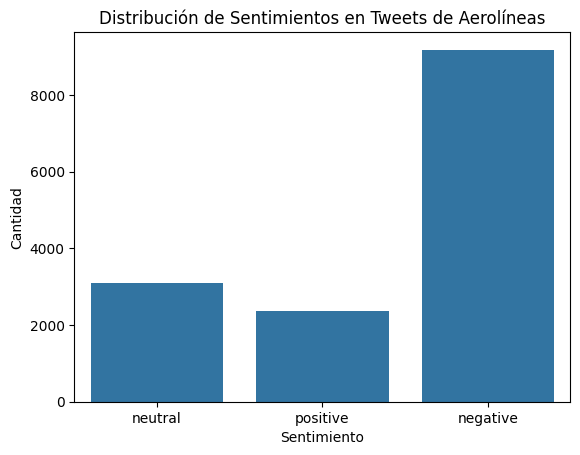

In [ ]:

# Distribución de clases
sns.countplot(data=df, x="airline_sentiment")
plt.title("Distribución de Sentimientos en Tweets de Aerolíneas")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.show()


## 2) Preparación y Vectorización (Bolsa de Palabras)

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

# Variables de entrada (X) y salida (y)
X = df["text"]
y = df["airline_sentiment"]

# Vectorización con CountVectorizer usando stopwords en inglés
vectorizer = CountVectorizer(stop_words="english")
X_vec = vectorizer.fit_transform(X)

print("Tamaño de la matriz de características:", X_vec.shape)


Tamaño de la matriz de características: (14640, 14770)


## 3) División (train/test) y Entrenamiento del Modelo

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
print("Modelo entrenado.")


Modelo entrenado.


## 4) Evaluación del Modelo

Accuracy: 0.7616


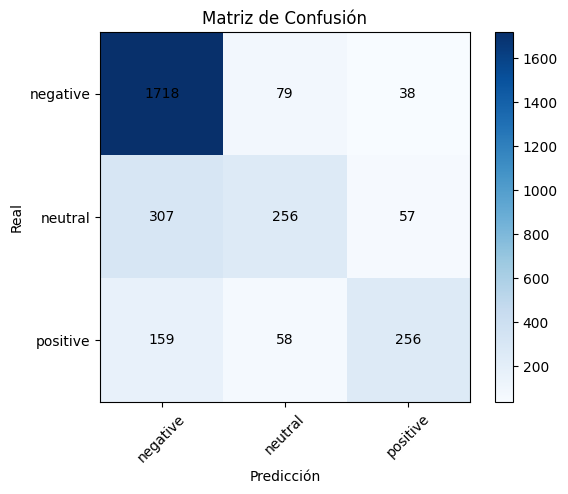

Reporte de Clasificación:
              precision    recall  f1-score   support

    negative       0.79      0.94      0.85      1835
     neutral       0.65      0.41      0.51       620
    positive       0.73      0.54      0.62       473

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928



In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Predicciones
y_pred = model.predict(X_test)

# Exactitud
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Matriz de confusión
labels = np.unique(y)  # asegurar el orden de etiquetas
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Visualización de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap="Blues")
ax.set_title("Matriz de Confusión")
ax.set_xlabel("Predicción")
ax.set_ylabel("Real")
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

# Anotar valores
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center")

fig.colorbar(im)
plt.show()

# Reporte detallado
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=labels))



## 5) Conclusión (para entregar)
**Resumen sugerido**:  
El modelo **Multinomial Naive Bayes** con **CountVectorizer** alcanzó una exactitud aproximada entre **0.75 y 0.80** (puede variar según la partición aleatoria). Dado que se utilizó un enfoque básico de Bolsa de Palabras y sin un preprocesamiento profundo, el rendimiento es adecuado para una primera versión.  
Se observó mejor desempeño en la clase **negativa** (la más frecuente en el dataset), y dificultades relativas para distinguir entre **neutro** y **positivo**.
